In [18]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from plotter import plot_image, plot_value_array
from keras.models import model_from_json


# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshaping data to keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# making sure that the values are float so that we can get decimal after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255


In [19]:
# load weights into new model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# evaluate loaded model on test data
loaded_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_train)
print(score)

60000/60000 [==============================] - 6s 107us/step
[0.004853689048839927, 0.9986166666666667]


In [23]:
# prediction
pred = loaded_model.predict(x_test)
print ("Shape of prediction is :", pred.shape)
print ("Prediction result: ", pred[0], y_test[0])

# single incident predection
single_test = np.expand_dims(x_test[0], axis = 0) # dimension expansion
pred2 = loaded_model.predict(single_test)


Shape of prediction is : (10000, 10)
Prediction result:  [6.3049274e-15 1.8138177e-12 1.3396292e-11 2.4837740e-10 1.2748297e-16
 3.8320888e-16 6.5332017e-20 1.0000000e+00 6.9309879e-12 8.1451694e-12] 7


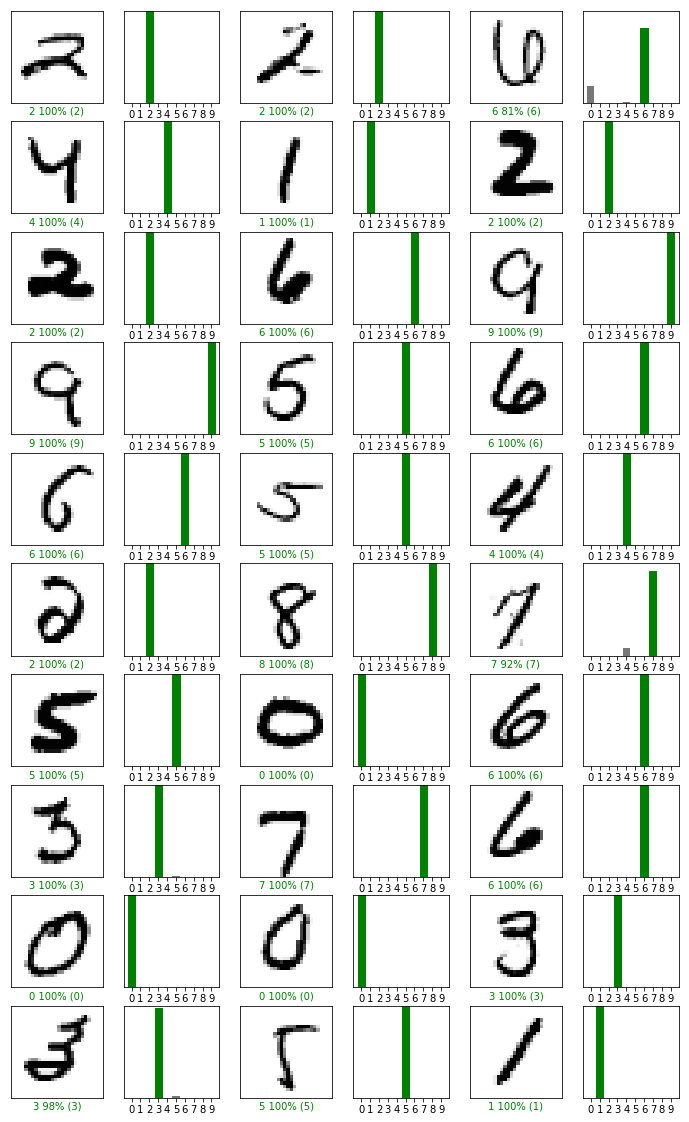

In [22]:
# visualize evaluation result
# create the palate of images with the prediction
# label shown in green if the prediction is correct. Otherwise, it'll be in red
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    img_no = random.randint(1,10000)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(img_no, pred, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(img_no, pred, y_test)
